In [ ]:
'''300 epochs| acc 92.23 |val 77.08 | AISUCCESS3_with_new_train.h5'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.3.0


# Loading all packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import os
import keras 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import regularizers

print(os.listdir("/content/drive/My Drive/AI project-HAL9000/Images Data"))

['Vivekananda_Rock_Memorial', 'Vidhana_Soudha', 'Victoria_Terminal_Mumbai', 'Victoria_Memorial', 'Thanjavur_Chola_Temple', 'Agra_Fort', 'Taj_Mahal', 'Ajanta_and_Ellora_caves_Anurangabad', 'Amer_Fort', 'Bangalore_Palace', 'Shore_Temple_Mahabalipuram', 'Bekal_Fort', 'Charminar_hyderabad', 'Sanchi_Stupa', 'City_Palace_Jaipur', 'Elephanta_cave_Mumbai', 'Red_Fort', 'Fatehpur_Sikri', 'Gateway_of_India', 'Rashtrapati_Bhavan', 'India_Gate', 'Gingee_Fort', 'Jama_Masjid', 'Ran_ki_Vav', 'Golden_temple_Amristar', 'Qutub_Minar', 'Golkonda_fort_hyderabad', 'Gwalior_Fort', 'Nalanda_University', 'Hawa_Mahal', 'Mysore_Palace', 'Hill_Palace_Thripunithara', 'Howrah_bridge_kolkata', 'Madhurai_Meenakshi_Temple', 'Humayuns_Tomb', 'Jantar_Mantar', 'Lotus_Temple', 'Kaye_Monastry_himachal_pradesh', 'Konark_Sun_Temple', 'Baslica_of_Bom_Jesus']


# Defining Model

In [ ]:
model = Sequential()
model.add(Conv2D(48, 11, input_shape=(227,227,3), strides=3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(3, strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, 5, strides=3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(3, strides=2))
model.add(BatchNormalization())

model.add(Conv2D(192, 3, strides=1, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(192, 3, strides=1, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(3, strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(40, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))  # when multiclass classification, activation is softmax
model.summary()           

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 76, 76, 48)        17472     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 48)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 37, 37, 48)        192       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       153728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 192)        

# Data Loading & Augmentation

In [ ]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,    
                               featurewise_center=True,
                               samplewise_center=False, 
                               samplewise_std_normalization=False, 
                               zca_whitening=False,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]
    )

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        "/content/drive/My Drive/AI project-HAL9000/Images Data/",  
        target_size=(227, 227), 
        batch_size=batch_size,shuffle=True,color_mode="rgb",
        class_mode='categorical') 

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        "/content/drive/My Drive/AI project-HAL9000/Validation_Images/",
        target_size=(227, 227),
        batch_size=batch_size,shuffle=True,color_mode="rgb",
        class_mode='categorical')

Found 444 images belonging to 40 classes.
Found 120 images belonging to 40 classes.


In [ ]:
train_num=train_generator.samples
val_num=validation_generator.samples


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting

In [ ]:
#for 300 epochs with updated train data
history=model.fit(
        train_generator,
        steps_per_epoch=train_num//batch_size,
        epochs=300,
        validation_data=validation_generator,verbose=1,
        validation_steps=val_num//batch_size)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/300
13/13 [==============================] - 35s 3s/step - loss: 37.0330 - accuracy: 0.0288 - val_loss: 34.5702 - val_accuracy: 0.0312
Epoch 2/300
13/13 [==============================] - 33s 3s/step - loss: 31.8055 - accuracy: 0.0461 - val_loss: 29.8420 - val_accuracy: 0.0312
Epoch 3/300
13/13 [==============================] - 32s 2s/step - loss: 26.9209 - accuracy: 0.0801 - val_loss: 25.0256 - val_accuracy: 0.0208
Epoch 4/300
13/13 [==============================] - 32s 2s/step - loss: 22.6542 - accuracy: 0.1141 - val_loss: 21.5117 - val_accuracy: 0.0208
Epoch 5/300
13/13 [==============================] - 33s 3s/step - loss: 19.2331 - accuracy: 0.1748 - val_loss: 18.0983 - val_accuracy: 0.0521
Epoch 6/300
13/13 [==============================] - 33s 3s/step - loss: 16.5128 - accuracy: 0.1723 - val_loss: 15.7896 - val_accuracy: 0.1042
Epoch 7/300
13/13 [==============================] - 32s 2s/step - loss: 14.2605 - accuracy: 0.1917 - val_loss: 14.5331 - val_accuracy: 0.0208

In [ ]:
#model.save("/content/drive/My Drive/AI project-HAL9000/Models/AISUCCESS3_with_new_train.h5")

# Plotting

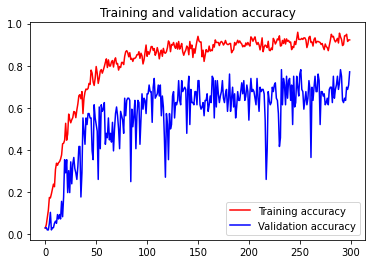

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# CLASSIFIER

In [ ]:
# load model
from keras.models import load_model
model = load_model('/content/drive/My Drive/AI project-HAL9000/Models/AISUCCESS3_with_new_train.h5')

Hi!
May I help you with the place?
Enter the file path : /content/drive/MyDrive/AI project-HAL9000/Images Data/Agra_Fort/Agra_Fort0.jpg
Class :  0
You are at :  Agra Fort


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


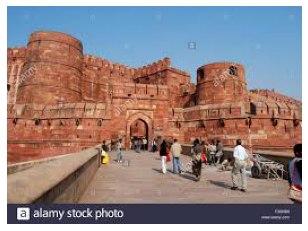

In [ ]:
ph=input("Hi!\nMay I help you with the place?\nEnter the file path : ")

img = load_img(ph, target_size=(227, 227))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# stack up images list to pass for prediction
images = np.vstack(img)

classes = model.predict_classes(img, batch_size=10)
print("Class : ",classes[0])
spot={0:'Agra Fort',1:'Ajanta and Ellora Caves',2:'Amer Fort',3:'Bangalore Palace',4:'Basilica of Bom Jesus',5:'Bekal Fort',6:'Charminar',7:'City Palace',8:'Elephanta Cave',9:'Fatehpur Sikri',10:'Gateway of India',11:'Gingee Fort',12:'Golden Temple',13:'Golkonda Fort',14:'Gwalior Fort',15:'Hawa Mahal',16:'Hill Palace',17:'Howrah Bridge',18:'Humayuns Tomb',19:'India Gate',20:'Jama Masjid',21:'Janta Mantir',22:'Kaye Monastry',23:'Konark Sun Temple',24:'Lotus Temple',25:'Madurai Meenakshi Temple',26:'Mysore Palace',27:'Nalanda University',28:'Qutub Minar',29:'Ran ki Vav',30:'Rashtrapati Bhavan',31:'Red Fort',32:'Sanchi Stupa',33:'Shore Temple Mahabalipuram',34:'Taj Mahal',35:'Thanjavur Chola Temple',36:'Victoria Memorial',37:'Victoria Terminal',38:'Vidhana Soudha',39:'Vivekananda Rock Memorial'}

print("You are at : ",spot[classes[0]])
img = mpimg.imread(ph)
plt.imshow(img)
plt.axis('Off')
plt.show()

place=spot[classes[0]]
#/content/drive/MyDrive/AI project-HAL9000/Images Data/Agra_Fort/Agra_Fort0.jpg

# CHATBOT

In [ ]:
!pip install allennlp

     |████████████████████████████████| 491kB 4.6MB/s 
     |████████████████████████████████| 317kB 12.9MB/s 
     |████████████████████████████████| 778kB 20.0MB/s 
     |████████████████████████████████| 266kB 29.1MB/s 
     |████████████████████████████████| 1.1MB 28.7MB/s 
     |████████████████████████████████| 3.0MB 41.9MB/s 
     |████████████████████████████████| 890kB 56.8MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp36-none-any.whl size=10174 sha256=b8c5e11f700c4ece2164ff8df874ebc220ff4ac83acd87eba4fed97cd0841320
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
  Created wheel for jsonnet: filename=jsonnet-0.16.0-cp36-cp36m-linux_x86_64.whl size=3321623 sha256=7ada7b3ba3a575baecd1b53cebe800828dd8d7915f8d73504157cd2d77b4bc15
  Stored in directory: /root/.cache/pip/wheels/64/a9/43/bc5e0463deeec89dfca928a2a64595f1bdb520c891f6fbd09c
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any

In [ ]:
! pip install allennlp_models
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bidaf-elmo-model-2020.03.19.tar.gz")

     |████████████████████████████████| 327kB 4.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=5588 sha256=61453cdec806258c50a5179a664d45313150cf98fb9b51156ac0393a93a471bd
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=a0a854d7218d9839716f007a4ccbbf468fb731e0a480293d80598fadbcbd78be
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built word2number ftfy
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


downloading: 100%|##########| 374434792/374434792 [00:04<00:00, 77809169.19B/s]


In [ ]:
passage = open("/content/drive/My Drive/AI project-HAL9000/Text Data/"+place+".txt", "r")
type(passage)
passage=passage.read()
type(passage)
passage

'Agra Fort\n"Agra Fort is a historical fort in the city of Agra in India. It was the main residence of the emperors of the Mughal Dynasty until 1638, when the capital was shifted from Agra to Delhi. Before capture by the British, the last Indian rulers to have occupied it were the Marathas. In 1983, the Agra fort was inscribed as a UNESCO World Heritage site. It is about 2.5 km northwest of its more famous sister monument, the Taj Mahal. The fort can be more accurately described as a walled city.\nIt had been used by the early mughal rulers. The Fort stands on an ancient site and was traditionally known as Badalgarh. It was captured by Ghaznavi for some time but in the 15th century A.D. the Chauhan Rajputs occupied it. Soon after, Agra assumed the status of capital when Sikandar Lodi (A.D. 1487–1517) shifted his capital from Delhi and constructed a few buildings in the pre-existing Fort at Agra. After the first battle of Panipat (A.D. 1526) Mughals captured the fort and ruled from it. 

In [ ]:
question=input("Want to know more about "+place+"?\n")

Want to know more about Agra Fort?
During whose reign the Fort got its present appearance?


In [ ]:
#When did Agra Fort win the Aga Khan Award for Architecture?
#During whose reign the Fort got its present appearance?
#How far is Agra Fort from Taj Mahal?
result=predictor.predict(
  passage=passage,
  question=question
)
result['best_span_str']

'Akbar'